In [1]:
import pandas as pd
import os
from pathlib import Path
import sys
sys.path.append("./../../")
from scripts.framework.utils import *
import json
project_root = "../../"

In [2]:
import matplotlib.pyplot as plt
from typing import List, Union, Any, Tuple, Dict
import numpy as np
# plot scatter plot of utility and semantic metric for each cluster
def plot_pareto_points(pareto_points:List, est_pareto_points:List=None, est_pareto_points2:List=None, explored_points:List=None, points_df=None) -> Tuple:
    """
    Plot the estimated and ground truth Pareto fronts.
    Args:
        pareto_points (List): Ground truth Pareto front
        est_pareto_points (List): Estimated Pareto front
    """
    # Sort the points for plotting
    #pareto_points = sorted(pareto_points, key=lambda x: x[1])
    #est_pareto_points = sorted(est_pareto_points, key=lambda x: x[1])
    # Plot the Pareto front
    pareto_points = np.array(pareto_points)
    #est_pareto_points = np.array(est_pareto_points)
    #datapoints = np.array(datapoints)
    # Set size of the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    #f, ax = plt.subplots()
    #ax.scatter(datapoints[0], datapoints[1], c='gray', label='Data Points', alpha=0.3)
    markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
    #for cluster in points_df['Cluster'].unique():
    #    cluster_points = points_df[points_df['Cluster'] == cluster]
    #    marker_index = int(cluster % len(markers))
    #    ax.scatter(cluster_points['Semantic'], cluster_points['Utility'], label=cluster, color=colors[cluster], alpha=0.5, marker=markers[marker_index])

    #ax.scatter(explored_points[0], explored_points[1], c='gray', label='Explored Points', marker='x',)
    ax.plot(pareto_points[1], pareto_points[0], '+', c='red', label='Ground Truth', markersize=10)
    
    if est_pareto_points is not None:
        ax.plot(est_pareto_points[1], est_pareto_points[0], 's', c='green', label='Q-learning', markersize=10)
    
    if est_pareto_points2 is not None:
        ax.plot(est_pareto_points2[1], est_pareto_points2[0], 'v', c='purple', label='Random', markersize=10)
    
    ax.legend(bbox_to_anchor=(1, 1.2),ncol=2, fontsize=12)
    ax.set_ylabel('Semantic', fontsize=14)
    ax.set_xlabel('Utility', fontsize=14)
    #ax.set_title('Pareto Curve Estimated vs. Ground-Truth', fontsize=14)
    return fig, ax

In [3]:
dataset = 'bank'
exp_config = json.load(open(os.path.join(project_root, 'data', dataset, f'{dataset}.json')))
attributes = list(exp_config['attributes'].keys())
attributes

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years of Credit History']

In [4]:
truth_dir = os.path.join(project_root, "truth", 'single_attrs')
utility_function = 'spearman'

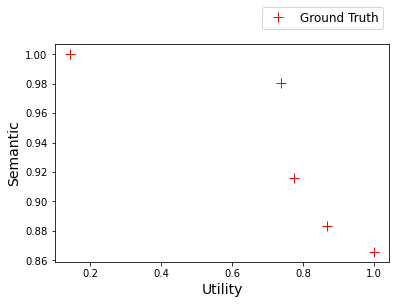

In [5]:
attr = 'Credit Score'
dataset = 'bank'
gt_filepath = os.path.join(truth_dir, f'{dataset}.{attr}.{utility_function}.csv')
df = pd.read_csv(gt_filepath)
gt_df = df.copy()
semantic_metric = 'KLDiv'
datapoints = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
lst = compute_pareto_front(datapoints)
gt_df["Estimated"] = 0
gt_df.loc[lst, "Estimated"] = 1
gt_df["Explored"] = 1

# Save the results
gt_df = gt_df[gt_df['Estimated'] == 1]
# remove duplicates
gt_df = gt_df.drop_duplicates(subset=[semantic_metric, 'utility'])
points = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
fig, ax = plot_pareto_points(points)

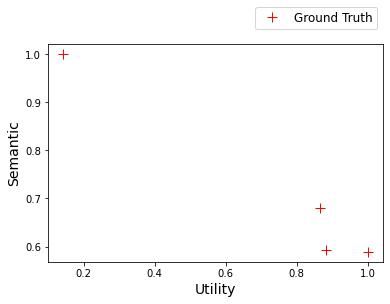

In [6]:
attr = 'Credit Score'
dataset = 'bank'
gt_filepath = os.path.join(truth_dir, f'{dataset}.{attr}.{utility_function}.csv')
df = pd.read_csv(gt_filepath)
gt_df = df.copy()
semantic_metric = 'l2_norm'
datapoints = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
lst = compute_pareto_front(datapoints)
gt_df["Estimated"] = 0
gt_df.loc[lst, "Estimated"] = 1
gt_df["Explored"] = 1

# Save the results
gt_df = gt_df[gt_df['Estimated'] == 1]
# remove duplicates
gt_df = gt_df.drop_duplicates(subset=[semantic_metric, 'utility'])
points = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
fig, ax = plot_pareto_points(points)

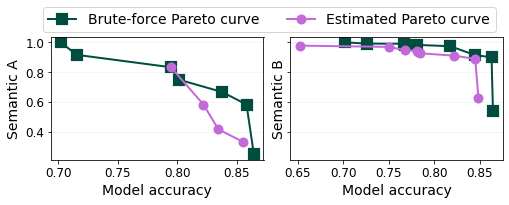

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pareto_points(pareto_points, est_pareto_points=None, est_pareto_points2=None, ax=None):
    """
    Plot the estimated and ground truth Pareto fronts on a given axis.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
    else:
        fig = ax.figure
    pareto_points = np.array(pareto_points)

    # --- sort by y-axis (Semantic, index 0) ---
    order = np.argsort(pareto_points[0])
    pareto_points = pareto_points[:, order]

    # Ground truth with line + thicker markers
    ax.plot(
        pareto_points[1], pareto_points[0],
        marker='s', markersize=12, markeredgewidth=0.2,
        linestyle='-', linewidth=2, color="#004D40",
        label='Brute-force Pareto curve'
    )

    if est_pareto_points is not None:
        est_pareto_points = np.array(est_pareto_points)
        # --- sort by y-axis (Semantic, index 0) ---
        order = np.argsort(est_pareto_points[1])
        est_pareto_points = est_pareto_points[:, order]
        ax.plot(
            est_pareto_points[1], est_pareto_points[0],
            marker='o', markersize=8, markeredgewidth=2,
            linestyle='-', linewidth=2, color="#C469D9",
            label='Estimated Pareto curve'
        )
    
    if est_pareto_points2 is not None:
        ax.plot(
            est_pareto_points2[1], est_pareto_points2[0],
            marker='v', markersize=8, markeredgewidth=2,
            linestyle='-', linewidth=2, color='purple',
            label='Random'
        )
    #ax.set_ylabel('Semantic', fontsize=14)
    ax.set_xlabel('Model accuracy', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(axis='y', linestyle=':', alpha=0.4)
    return fig, ax

# Create 2 subplots in one figure
fig, axes = plt.subplots(1, 2, figsize=(7, 2.3), sharey=True)
plt.tight_layout()

truth_dir = os.path.join(project_root, "truth")

# --- Plot 1 (KLDiv) ---
semantic_metric = 'gpt_semantics'
gt_filepath = os.path.join(truth_dir, f'pima.multi_attrs.DecisionTreeClassifier.gpt_semantics.csv')
df = pd.read_csv(gt_filepath)
gt_df = df.copy()
# divide semantic by 4
datapoints = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
lst = compute_pareto_front(datapoints)
gt_df["Estimated"] = 0
gt_df.loc[lst, "Estimated"] = 1
gt_df = gt_df[gt_df['Estimated'] == 1].drop_duplicates(subset=[semantic_metric, 'utility'])
points = [np.array(gt_df[semantic_metric].values)/4, np.array(gt_df['utility'].values)]

# Randomly sample 
random_points = [[2.33333333, 0.82191781],
 [1.66666667, 0.83443709],
 [1.33333333, 0.85517241],
 [3.33333333, 0.79452055]]
random_points = np.array(random_points).T
random_points[0] = random_points[0]/4

plot_pareto_points(points, ax=axes[0], est_pareto_points=random_points)
axes[0].set_ylabel('Semantic A', fontsize=14)

# --- Plot 2 (l2_norm) ---
semantic_metric = 'KLDiv'
gt_filepath = os.path.join(truth_dir, f'pima.multi_attrs.DecisionTreeClassifier.KLDiv.csv')
df = pd.read_csv(gt_filepath)
gt_df = df.copy()
datapoints = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
lst = compute_pareto_front(datapoints)
gt_df["Estimated"] = 0
gt_df.loc[lst, "Estimated"] = 1
gt_df = gt_df[gt_df['Estimated'] == 1].drop_duplicates(subset=[semantic_metric, 'utility'])
points = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
random_points = [[0.97827931, 0.65217391],
 [0.62789346, 0.84827586],
 [0.92722649, 0.78378378],
 [0.91098679, 0.82178218],
 [0.96994965, 0.75      ],
 [0.94852953, 0.76712329],
 [0.94241596, 0.78082192],
 [0.88906187, 0.84482759],
 [0.93342284, 0.78145695]]
random_points = np.array(random_points).T

plot_pareto_points(points, ax=axes[1], est_pareto_points=random_points)
axes[1].set_ylabel('Semantic B', fontsize=14)

plt.legend(bbox_to_anchor=(1, 1.3), ncol=2, fontsize=14)
#plt.tight_layout()
plt.savefig(f'intro.png', bbox_inches='tight')
plt.show()


In [44]:
import numpy as np

# Example arrays
y_vals = datapoints[0]
x_vals = datapoints[1]

def sample_points(x_vals, y_vals, N, seed=None):
    """
    Randomly sample N points from (x_vals, y_vals) pairs.
    """
    if seed is not None:
        np.random.seed(seed)  # for reproducibility
    
    # Number of available points
    total = len(x_vals)
    
    # Pick N unique random indices
    indices = np.random.choice(total, size=N, replace=False)
    
    # Subset the arrays
    x_sample = x_vals[indices]
    y_sample = y_vals[indices]
    
    return np.array([y_sample, x_sample])

# Example: pick 10 random points
sampled_points = sample_points(x_vals, y_vals, N=20, seed=42)
print(sampled_points)


[[0.57580736 0.48021999 0.58101027 1.         0.67541468 0.48685322
  0.54594163 0.59565933 0.52910406 0.42044778 0.49100184 0.68106544
  0.59098918 0.53795301 0.58885908 0.53635152 0.42835377 0.4715838
  0.59850153 0.65709305]
 [1.         0.77459667 0.2        0.14285714 0.8660254  0.77459667
  1.         0.78571429 0.5        0.73029674 0.68491749 0.8660254
  0.5        0.8660254  1.         0.8660254  0.77459667 0.77459667
  0.69825325 0.25      ]]


In [45]:
def select_points_by_index(x_vals, y_vals, indices):
    """
    Select points from (x_vals, y_vals) using a list of indices.
    """
    indices = np.array(indices, dtype=int)  # make sure they're integers
    x_sel = x_vals[indices]
    y_sel = y_vals[indices]
    return np.array([y_sel, x_sel])

# Example usage
i_ls = compute_pareto_front(sampled_points)

selected_points = select_points_by_index(datapoints[1], datapoints[0], i_ls)

print(selected_points.shape)  # (2, len(indices))
print(selected_points)


(2, 3)
[[0.58885459 0.57832527 0.51265595]
 [1.         0.5        0.8660254 ]]


In [41]:
i_ls

[3, 4, 0]